In [17]:
from nilearn import datasets

dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_filename = dataset.maps
labels = dataset.labels

print(f"Atlas ROIs are located in nifti image (4D) at: {atlas_filename}")

# One subject of brain development fMRI data
file_name = "/Users/ojun-yong/Desktop/bids_ex/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-BRAINMRINONCONTRASTDIFFUSION_acq-AxialfMRIrest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
confounds = "/Users/ojun-yong/Desktop/bids_ex/fmriprep/sub-01/ses-1/func/sub-01_ses-1_task-BRAINMRINONCONTRASTDIFFUSION_acq-AxialfMRIrest_desc-confounds_timeseries.tsv"

Atlas ROIs are located in nifti image (4D) at: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform

In [18]:
from nilearn.maskers import NiftiLabelsMasker

masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)


In [19]:
import pandas as pd
confounds = pd.read_csv(confounds,sep='\t')

In [22]:
confounds.head()

,global_signal,global_signal_derivative1,global_signal_power2,global_signal_derivative1_power2,csf,csf_derivative1,csf_power2,csf_derivative1_power2,white_matter,white_matter_derivative1,...,motion_outlier17,motion_outlier18,motion_outlier19,motion_outlier20,motion_outlier21,motion_outlier22,motion_outlier23,motion_outlier24,motion_outlier25,motion_outlier26
0,33207.424963,NaN,1.102733e+09,NaN,48385.265657,NaN,2.341134e+09,NaN,29972.004377,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,33161.243789,-46.181174,1.099668e+09,2132.700825,48292.741796,-92.523860,2.332189e+09,8560.664727,29959.682880,-12.321497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,32971.761323,-189.482466,1.087137e+09,35903.604797,48044.615125,-248.126671,2.308285e+09,61566.844776,29902.297502,-57.385378,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32827.589728,-144.171595,1.077651e+09,20785.448848,47920.771804,-123.843322,2.296400e+09,15337.168310,29854.040344,-48.257158,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32756.039555,-71.550173,1.072958e+09,5119.427223,47886.457075,-34.314729,2.293113e+09,1177.500603,29837.333014,-16.707330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample")


In [21]:
from nilearn.interfaces.fmriprep import load_confounds_strategy

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
[Memory]214.7s, 3.6min  : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


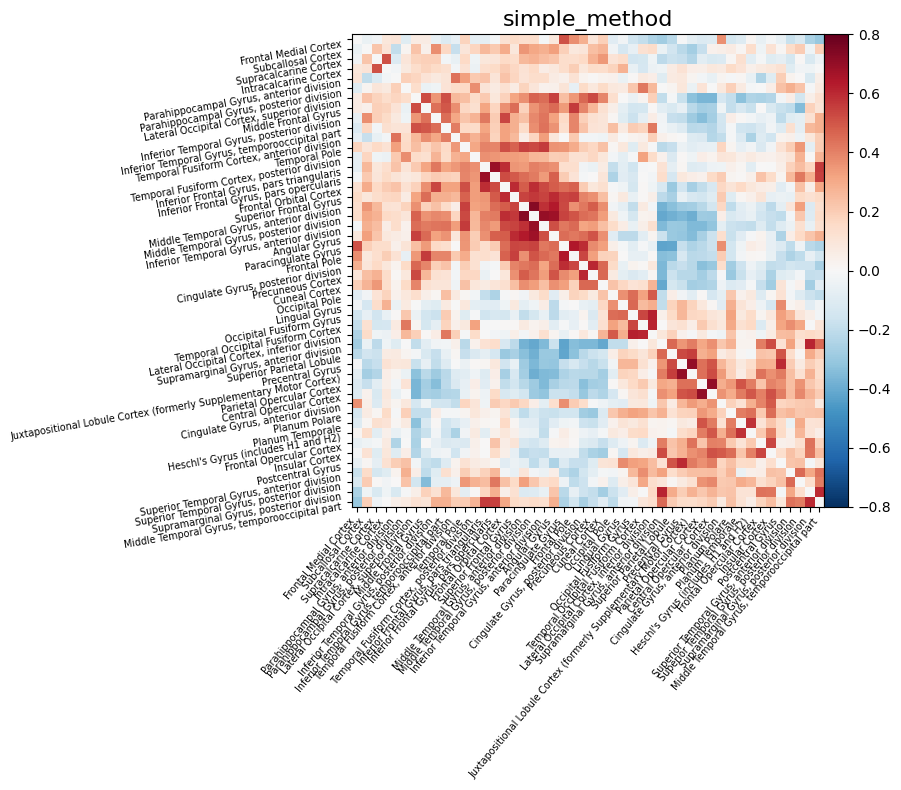

In [28]:
import numpy as np
from nilearn import plotting

confounds_1,sample_mask = load_confounds_strategy(
    file_name,denoise_strategy="compcor",motion="basic"
)

time_series = masker.fit_transform(file_name,confounds=confounds_1,sample_mask=sample_mask)

correlation_matrix = correlation_measure.fit_transform([time_series])[0]

np.fill_diagonal(correlation_matrix,0)

plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
    title="simple_method",
    reorder=True,
)